<a href="https://colab.research.google.com/github/shailendra-repo/Python/blob/main/Historical_stock_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Historical stock data

In [1]:
import pandas as pd
import pandas_datareader
import numpy as np
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 78) 
pd.set_option('precision', 3)

In [2]:
start = datetime.date(2012,1,1)
end = datetime.date(2014,12,30)

In [3]:
#!pip install pandas_datareader --upgrade

In [4]:
msft = pandas_datareader.DataReader('MSFT','yahoo',start,end)
msft

             High    Low   Open  Close     Volume  Adj Close
Date                                                        
2012-01-03  26.96  26.39  26.55  26.77  6.473e+07     21.707
2012-01-04  27.47  26.78  26.82  27.40  8.052e+07     22.218
2012-01-05  27.73  27.29  27.38  27.68  5.608e+07     22.445
2012-01-06  28.19  27.53  27.53  28.11  9.946e+07     22.794
2012-01-09  28.10  27.72  28.05  27.74  5.971e+07     22.494
...           ...    ...    ...    ...        ...        ...
2014-12-23  48.80  48.13  48.37  48.45  2.365e+07     42.761
2014-12-24  48.64  48.08  48.64  48.14  1.144e+07     42.487
2014-12-26  48.41  47.82  48.41  47.88  1.320e+07     42.258
2014-12-29  47.78  47.26  47.70  47.45  1.444e+07     41.878
2014-12-30  47.62  46.84  47.44  47.02  1.638e+07     41.499

[753 rows x 6 columns]

In [5]:
def get(tickers, start, end):
  def data(ticker):
    return pandas_datareader.DataReader(ticker, 'yahoo',start, end)

  datas = map(data,tickers)
  return pd.concat(datas, keys=tickers, names=['Ticker','Date'])

In [6]:

# retrieves the historical prices for a list of stocks
def get(tickers, start, end):
    def data(ticker):
        return pandas_datareader.DataReader(ticker, 'yahoo', 
                                     start, end)
        
    datas = map(data, tickers)
    
    return pd.concat(datas, keys=tickers, 
                     names=['Ticker', 'Date'])

In [7]:

# get data for the following stocks
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO']
all_data = get(tickers, start, end)
all_data[:5]

                     High     Low    Open   Close     Volume  Adj Close
Ticker Date                                                            
AAPL   2012-01-03  14.732  14.607  14.621  14.687  3.022e+08     12.610
       2012-01-04  14.810  14.617  14.643  14.766  2.600e+08     12.678
       2012-01-05  14.948  14.738  14.820  14.930  2.713e+08     12.819
       2012-01-06  15.098  14.972  14.992  15.086  3.183e+08     12.953
       2012-01-09  15.277  15.048  15.196  15.062  3.940e+08     12.932

In [8]:
all_data[:1]

                     High     Low    Open   Close     Volume  Adj Close
Ticker Date                                                            
AAPL   2012-01-03  14.732  14.607  14.621  14.687  3.022e+08      12.61

In [9]:
# get daily S&P500 info

sp_500 = pandas_datareader.DataReader("^GSPC",'yahoo',start, end)
sp_500.head()

               High      Low     Open    Close      Volume  Adj Close
Date                                                                 
2012-01-03  1284.62  1258.86  1258.86  1277.06  3943710000    1277.06
2012-01-04  1278.73  1268.10  1277.03  1277.30  3592580000    1277.30
2012-01-05  1283.05  1265.26  1277.30  1281.06  4315950000    1281.06
2012-01-06  1281.84  1273.34  1280.93  1277.81  3656830000    1277.81
2012-01-09  1281.99  1274.55  1277.83  1280.70  3371600000    1280.70

# Visualizing financial time series data

### Plotting closing prices

In [10]:
all_data['Adj Close']

Ticker  Date      
AAPL    2012-01-03    12.610
        2012-01-04    12.678
        2012-01-05    12.819
        2012-01-06    12.953
        2012-01-09    12.932
                       ...  
KO      2014-12-23    34.486
        2014-12-24    34.462
        2014-12-26    34.478
        2014-12-29    34.398
        2014-12-30    34.318
Name: Adj Close, Length: 6777, dtype: float64

In [11]:
# reset the index to make everythign columns

just_closing_prices = all_data[['Adj Close']].reset_index()
just_closing_prices.head()

  Ticker       Date  Adj Close
0   AAPL 2012-01-03     12.610
1   AAPL 2012-01-04     12.678
2   AAPL 2012-01-05     12.819
3   AAPL 2012-01-06     12.953
4   AAPL 2012-01-09     12.932

In [12]:
daily_close_px = just_closing_prices.pivot('Date','Ticker','Adj Close')
daily_close_px

Ticker          AA    AAPL     DAL  ...    MSFT     PEP    UAL
Date                                ...                       
2012-01-03  20.893  12.610   7.142  ...  21.707  49.918  18.90
2012-01-04  21.391  12.678   7.115  ...  22.218  50.174  18.52
2012-01-05  21.188  12.819   7.399  ...  22.445  49.783  18.39
2012-01-06  20.735  12.953   7.390  ...  22.794  49.159  18.21
2012-01-09  21.346  12.932   7.355  ...  22.494  49.415  17.93
...            ...     ...     ...  ...     ...     ...    ...
2014-12-23  36.890  25.510  42.422  ...  42.761  79.870  62.48
2014-12-24  36.984  25.390  43.250  ...  42.487  79.649  64.93
2014-12-26  37.101  25.838  43.556  ...  42.258  79.616  65.28
2014-12-29  37.101  25.820  43.907  ...  41.878  79.354  65.22
2014-12-30  37.172  25.505  44.312  ...  41.499  78.722  66.05

[753 rows x 9 columns]

In [13]:
daily_close_px[:5]

Ticker          AA    AAPL    DAL  ...    MSFT     PEP    UAL
Date                               ...                       
2012-01-03  20.893  12.610  7.142  ...  21.707  49.918  18.90
2012-01-04  21.391  12.678  7.115  ...  22.218  50.174  18.52
2012-01-05  21.188  12.819  7.399  ...  22.445  49.783  18.39
2012-01-06  20.735  12.953  7.390  ...  22.794  49.159  18.21
2012-01-09  21.346  12.932  7.355  ...  22.494  49.415  17.93

[5 rows x 9 columns]

<AxesSubplot:xlabel='Date'>

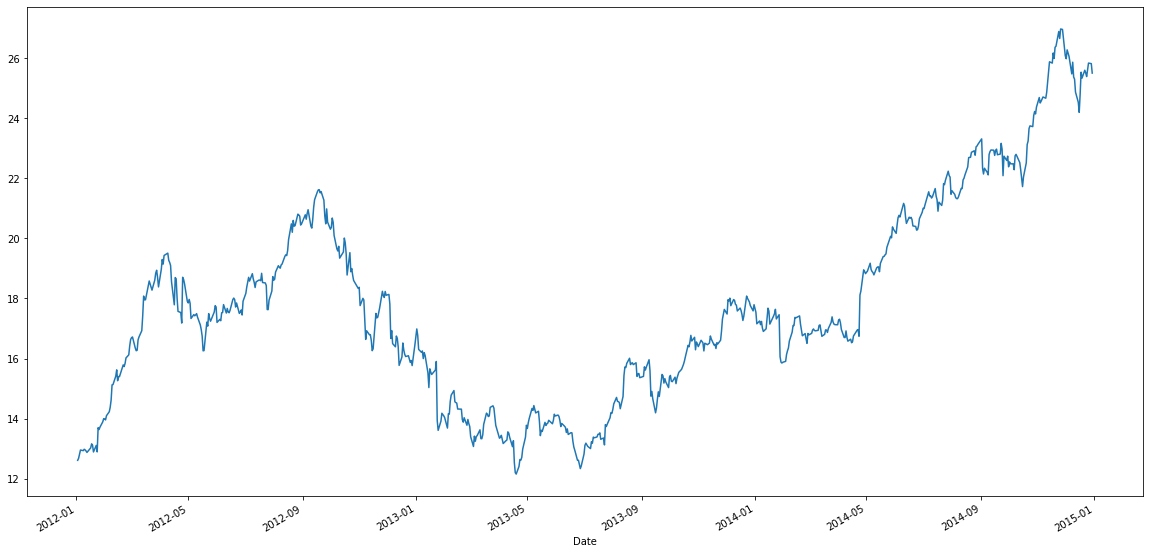

In [14]:
daily_close_px['AAPL'].plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

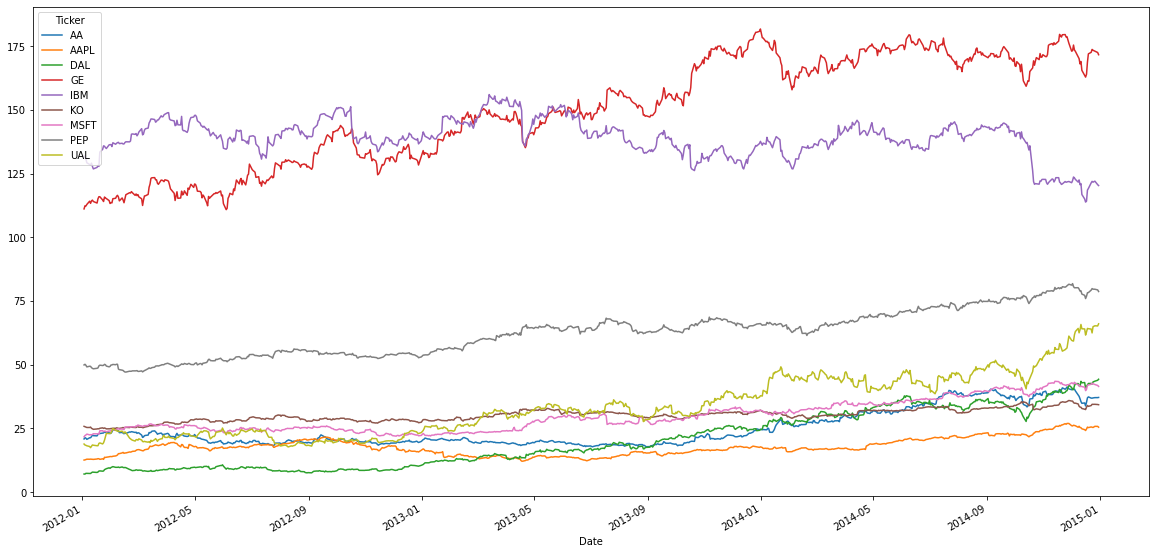

In [15]:
daily_close_px.plot(figsize=(20,10))

### Plotting volumes series data

In [16]:
msftV = all_data.Volume.loc['MSFT']
msftV

Date
2012-01-03    6.473e+07
2012-01-04    8.052e+07
2012-01-05    5.608e+07
2012-01-06    9.946e+07
2012-01-09    5.971e+07
                ...    
2014-12-23    2.365e+07
2014-12-24    1.144e+07
2014-12-26    1.320e+07
2014-12-29    1.444e+07
2014-12-30    1.638e+07
Name: Volume, Length: 753, dtype: float64

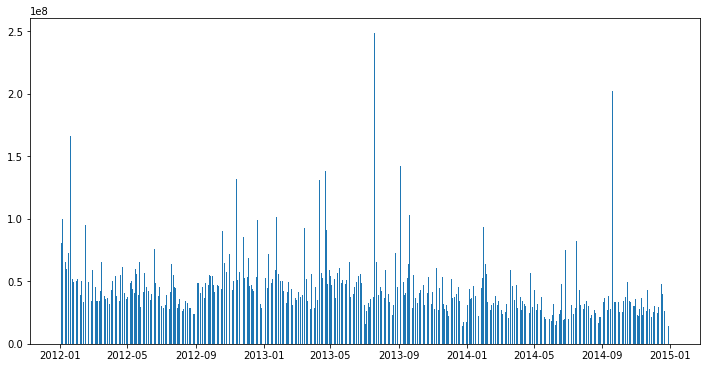

In [17]:
plt.bar(msftV.index, msftV)
plt.gcf().set_size_inches(12,6)

### Combined Price and Volumes

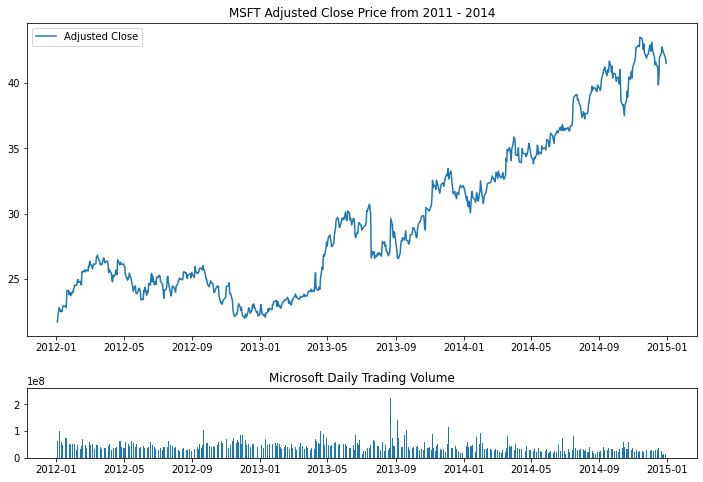

In [18]:

# draw a combined price vs volume graph
# subdivide the whole plot
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
# plot the price chart on the top
top.plot(daily_close_px.index, 
         daily_close_px['MSFT'], 
         label='Adjusted Close')
plt.title('MSFT Adjusted Close Price from 2011 - 2014')
plt.legend(loc=2)
# pick the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
# draw the bar at the bottom
bottom.bar(msftV.index, msftV)
plt.title('Microsoft Daily Trading Volume')
plt.gcf().set_size_inches(12,8) 
# set the size
plt.subplots_adjust(hspace=0.75)
plt.savefig('5104OS_05_04.png', bbox_inches='tight', dpi=300)

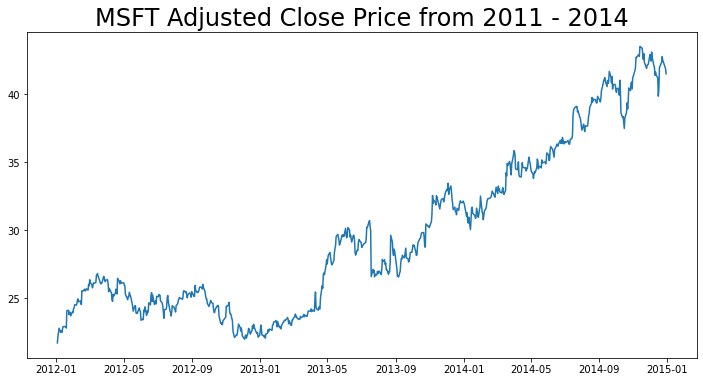

In [19]:
plt.plot(daily_close_px.index, daily_close_px.MSFT, label="MSFT Adj Close")
plt.title('MSFT Adjusted Close Price from 2011 - 2014', size=24)
plt.gcf().set_size_inches(12,6)



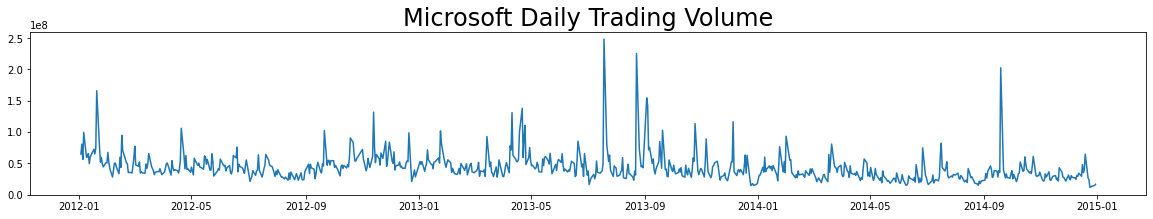

In [20]:
plt.plot(msftV.index, msftV)
plt.title('Microsoft Daily Trading Volume', size=24)
plt.gcf().set_size_inches(20,3)

## Plotting candlesticks

In [21]:
subset = all_data.loc['MSFT'].loc['2014-12':'2014-12'].reset_index()
subset[:5]

        Date   High    Low  ...  Close     Volume  Adj Close
0 2014-12-01  48.78  47.71  ...  48.62  3.119e+07     42.911
1 2014-12-02  49.05  48.20  ...  48.46  2.577e+07     42.770
2 2014-12-03  48.50  47.81  ...  48.08  2.353e+07     42.434
3 2014-12-04  49.06  48.20  ...  48.84  3.032e+07     43.105
4 2014-12-05  48.97  48.38  ...  48.42  2.731e+07     42.734

[5 rows x 7 columns]

In [22]:
subset.size

147

In [23]:
import matplotlib.dates as mdates
subset['Date'].apply(lambda date: mdates.date2num(date.to_pydatetime()))

0     16405.0
1     16406.0
2     16407.0
3     16408.0
4     16409.0
       ...   
16    16427.0
17    16428.0
18    16430.0
19    16433.0
20    16434.0
Name: Date, Length: 21, dtype: float64

In [24]:
subset['date_num'] = subset['Date'].apply(lambda date: mdates.date2num(date.to_pydatetime()))

In [25]:
subset.head()

        Date   High    Low  ...     Volume  Adj Close  date_num
0 2014-12-01  48.78  47.71  ...  3.119e+07     42.911   16405.0
1 2014-12-02  49.05  48.20  ...  2.577e+07     42.770   16406.0
2 2014-12-03  48.50  47.81  ...  2.353e+07     42.434   16407.0
3 2014-12-04  49.06  48.20  ...  3.032e+07     43.105   16408.0
4 2014-12-05  48.97  48.38  ...  2.731e+07     42.734   16409.0

[5 rows x 8 columns]

In [26]:
subset_as_tupes = [tuple(x) for x in subset[['date_num', 
                                              'Open', 
                                              'High', 
                                              'Low', 
                                              'Close']].values]
subset_as_tupes[:5]


[(16405.0,
  47.880001068115234,
  48.779998779296875,
  47.709999084472656,
  48.619998931884766),
 (16406.0,
  48.84000015258789,
  49.04999923706055,
  48.20000076293945,
  48.459999084472656),
 (16407.0, 48.439998626708984, 48.5, 47.810001373291016, 48.08000183105469),
 (16408.0,
  48.38999938964844,
  49.060001373291016,
  48.20000076293945,
  48.84000015258789),
 (16409.0,
  48.81999969482422,
  48.970001220703125,
  48.380001068115234,
  48.41999816894531)]

In [27]:
# required imports for fomatting
from matplotlib.dates import DateFormatter
week_formatter = DateFormatter('%b %d')  # e.g., Jan 12

In [28]:

# We want to only display labels for Mondays
from matplotlib.dates import (WeekdayLocator, MONDAY)
mondays = WeekdayLocator(MONDAY) # major ticks on the mondays

In [29]:
#!pip install matplotlib --upgrade

ModuleNotFoundError: ignored

<Figure size 864x576 with 0 Axes>

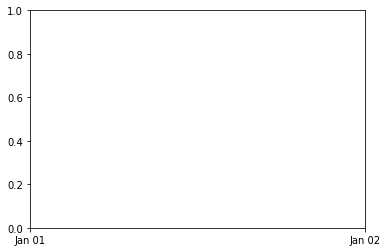

In [30]:
# now draw the plot
plt.figure(figsize=(12,8))
fig, ax = plt.subplots()
# set the locator and formatter for the x-axis
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(week_formatter)

# draw the candlesticks
from matplotlib.finance import candlestick_ohlc 
_ = candlestick_ohlc(ax, subset_as_tuples, width=0.6, 
                     colorup='g',colordown='r');
plt.savefig('5104OS_05_05.png', bbox_inches='tight', dpi=300)

## Fundamental Financial Calculations

In [31]:
daily_close_px.iloc[0]['AA'],daily_close_px.iloc[1]['AA']

(20.893423080444336, 21.39142608642578)

In [32]:
AA_p_t0 = daily_close_px.iloc[0]['AA']
AA_p_t1 = daily_close_px.iloc[1]['AA']
r_t1 = AA_p_t1 / AA_p_t0 -1

AA_p_t0,AA_p_t1,r_t1

(20.893423080444336, 21.39142608642578, 0.023835395668006187)

In [33]:
doc_1 = daily_close_px.iloc[1:] / daily_close_px[:-1].values -1
doc_1

Ticker             AA       AAPL    DAL  ...   MSFT        PEP        UAL
Date                                     ...                             
2012-01-04  2.384e-02  5.374e-03 -0.004  ...  0.024  5.121e-03 -2.011e-02
2012-01-05 -9.524e-03  1.110e-02  0.040  ...  0.010 -7.791e-03 -7.019e-03
2012-01-06 -2.137e-02  1.045e-02 -0.001  ...  0.016 -1.253e-02 -9.788e-03
2012-01-09  2.948e-02 -1.586e-03 -0.005  ... -0.013  5.200e-03 -1.538e-02
2012-01-10  1.060e-03  3.580e-03 -0.001  ...  0.004 -1.065e-03 -2.510e-02
...               ...        ...    ...  ...    ...        ...        ...
2014-12-23 -6.354e-04 -3.542e-03 -0.006  ...  0.010  7.659e-03 -2.375e-02
2014-12-24  2.543e-03 -4.710e-03  0.020  ... -0.006 -2.773e-03  3.921e-02
2014-12-26  3.171e-03  1.768e-02  0.007  ... -0.005 -4.120e-04  5.390e-03
2014-12-29  0.000e+00 -7.016e-04  0.008  ... -0.009 -3.297e-03 -9.191e-04
2014-12-30  1.896e-03 -1.220e-02  0.009  ... -0.009 -7.960e-03  1.273e-02

[752 rows x 9 columns]

In [34]:
doc_1.loc[:,'AA':'AAPL']

Ticker             AA       AAPL
Date                            
2012-01-04  2.384e-02  5.374e-03
2012-01-05 -9.524e-03  1.110e-02
2012-01-06 -2.137e-02  1.045e-02
2012-01-09  2.948e-02 -1.586e-03
2012-01-10  1.060e-03  3.580e-03
...               ...        ...
2014-12-23 -6.354e-04 -3.542e-03
2014-12-24  2.543e-03 -4.710e-03
2014-12-26  3.171e-03  1.768e-02
2014-12-29  0.000e+00 -7.016e-04
2014-12-30  1.896e-03 -1.220e-02

[752 rows x 2 columns]

In [35]:
price_matrix_minus_day1 = daily_close_px.iloc[1:]

In [36]:
price_matrix_minus_day1.head()

Ticker          AA    AAPL    DAL  ...    MSFT     PEP    UAL
Date                               ...                       
2012-01-04  21.391  12.678  7.115  ...  22.218  50.174  18.52
2012-01-05  21.188  12.819  7.399  ...  22.445  49.783  18.39
2012-01-06  20.735  12.953  7.390  ...  22.794  49.159  18.21
2012-01-09  21.346  12.932  7.355  ...  22.494  49.415  17.93
2012-01-10  21.369  12.979  7.346  ...  22.575  49.362  17.48

[5 rows x 9 columns]

In [37]:
daily_close_px.iloc[:-1].values

array([[20.89342308, 12.61031532,  7.14150381, ..., 21.70748711,
        49.91835022, 18.89999962],
       [21.39142609, 12.67808533,  7.1148572 , ..., 22.21834755,
        50.17395782, 18.52000046],
       [21.18769836, 12.81883812,  7.39909458, ..., 22.44539642,
        49.78304291, 18.38999939],
       ...,
       [36.9840889 , 25.38959312, 43.25019836, ..., 42.48716354,
        79.64888   , 64.93000031],
       [37.10135651, 25.83839989, 43.55623627, ..., 42.25769424,
        79.61606598, 65.27999878],
       [37.10135651, 25.82027245, 43.90727997, ..., 41.87818909,
        79.35355377, 65.22000122]])

In [38]:
dpc_2 = daily_close_px / daily_close_px.shift(1) -1

In [39]:
dpc_2.iloc[:,0:2][:5]

Ticker         AA   AAPL
Date                    
2012-01-03    NaN    NaN
2012-01-04  0.024  0.005
2012-01-05 -0.010  0.011
2012-01-06 -0.021  0.010
2012-01-09  0.029 -0.002

In [40]:
daily_pct_change = daily_close_px.pct_change()

In [41]:
daily_pct_change.iloc[:,0:2][:5]

Ticker         AA   AAPL
Date                    
2012-01-03    NaN    NaN
2012-01-04  0.024  0.005
2012-01-05 -0.010  0.011
2012-01-06 -0.021  0.010
2012-01-09  0.029 -0.002

In [42]:
daily_pct_change.fillna(0, inplace=True)

In [43]:
daily_pct_change.iloc[:5,:5]

Ticker         AA   AAPL    DAL         GE    IBM
Date                                             
2012-01-03  0.000  0.000  0.000  0.000e+00  0.000
2012-01-04  0.024  0.005 -0.004  1.089e-02 -0.004
2012-01-05 -0.010  0.011  0.040 -5.389e-04 -0.005
2012-01-06 -0.021  0.010 -0.001  5.391e-03 -0.011
2012-01-09  0.029 -0.002 -0.005  1.126e-02 -0.005

## Calculating simple daily cumulative returns

In [44]:
(1+daily_pct_change).cumprod()

Ticker         AA   AAPL    DAL  ...   MSFT    PEP    UAL
Date                             ...                     
2012-01-03  1.000  1.000  1.000  ...  1.000  1.000  1.000
2012-01-04  1.024  1.005  0.996  ...  1.024  1.005  0.980
2012-01-05  1.014  1.017  1.036  ...  1.034  0.997  0.973
2012-01-06  0.992  1.027  1.035  ...  1.050  0.985  0.963
2012-01-09  1.022  1.026  1.030  ...  1.036  0.990  0.949
...           ...    ...    ...  ...    ...    ...    ...
2014-12-23  1.766  2.023  5.940  ...  1.970  1.600  3.306
2014-12-24  1.770  2.013  6.056  ...  1.957  1.596  3.435
2014-12-26  1.776  2.049  6.099  ...  1.947  1.595  3.454
2014-12-29  1.776  2.048  6.148  ...  1.929  1.590  3.451
2014-12-30  1.779  2.023  6.205  ...  1.912  1.577  3.495

[753 rows x 9 columns]

In [45]:
daily_pct_change

Ticker             AA       AAPL    DAL  ...   MSFT        PEP        UAL
Date                                     ...                             
2012-01-03  0.000e+00  0.000e+00  0.000  ...  0.000  0.000e+00  0.000e+00
2012-01-04  2.384e-02  5.374e-03 -0.004  ...  0.024  5.121e-03 -2.011e-02
2012-01-05 -9.524e-03  1.110e-02  0.040  ...  0.010 -7.791e-03 -7.019e-03
2012-01-06 -2.137e-02  1.045e-02 -0.001  ...  0.016 -1.253e-02 -9.788e-03
2012-01-09  2.948e-02 -1.586e-03 -0.005  ... -0.013  5.200e-03 -1.538e-02
...               ...        ...    ...  ...    ...        ...        ...
2014-12-23 -6.354e-04 -3.542e-03 -0.006  ...  0.010  7.659e-03 -2.375e-02
2014-12-24  2.543e-03 -4.710e-03  0.020  ... -0.006 -2.773e-03  3.921e-02
2014-12-26  3.171e-03  1.768e-02  0.007  ... -0.005 -4.120e-04  5.390e-03
2014-12-29  0.000e+00 -7.016e-04  0.008  ... -0.009 -3.297e-03 -9.191e-04
2014-12-30  1.896e-03 -1.220e-02  0.009  ... -0.009 -7.960e-03  1.273e-02

[753 rows x 9 columns]

In [46]:

# calc the cumulative daily returns 
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return.iloc[:,:2][:5]

Ticker         AA   AAPL
Date                    
2012-01-03  1.000  1.000
2012-01-04  1.024  1.005
2012-01-05  1.014  1.017
2012-01-06  0.992  1.027
2012-01-09  1.022  1.026

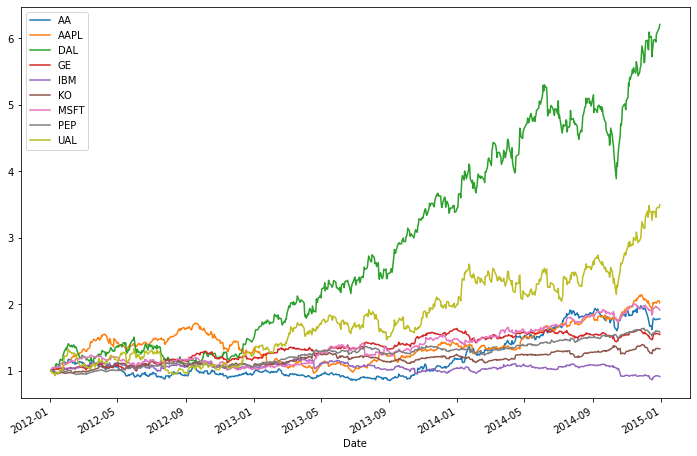

In [47]:
cum_daily_return.plot(figsize=(12,8))
plt.legend(loc=2)

## Analyzing distributions of returns

<AxesSubplot:>

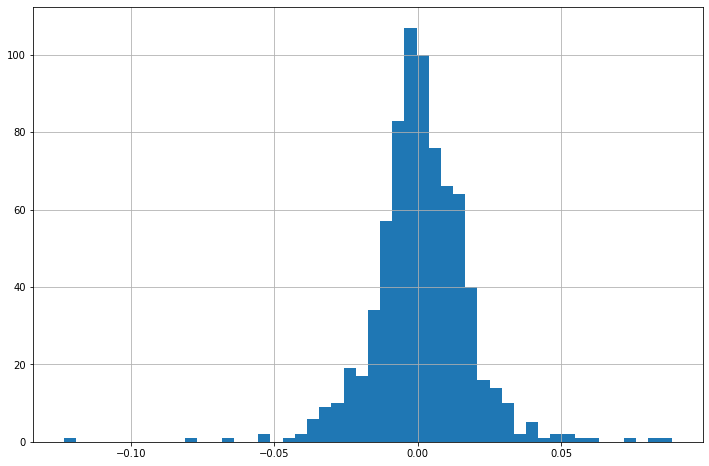

In [48]:
aapl = daily_pct_change['AAPL']
aapl.hist(bins=50, figsize=(12,8))

In [49]:
aapl.describe()

count    7.530e+02
mean     1.078e-03
std      1.684e-02
min     -1.236e-01
25%     -7.313e-03
50%      5.072e-04
75%      1.101e-02
max      8.874e-02
Name: AAPL, dtype: float64

In [50]:
aapl.describe(percentiles=[0.025,0.5,0.975])

count    7.530e+02
mean     1.078e-03
std      1.684e-02
min     -1.236e-01
2.5%    -3.192e-02
50%      5.072e-04
97.5%    3.171e-02
max      8.874e-02
Name: AAPL, dtype: float64

array([[<AxesSubplot:title={'center':'AA'}>,
        <AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'DAL'}>],
       [<AxesSubplot:title={'center':'GE'}>,
        <AxesSubplot:title={'center':'IBM'}>,
        <AxesSubplot:title={'center':'KO'}>],
       [<AxesSubplot:title={'center':'MSFT'}>,
        <AxesSubplot:title={'center':'PEP'}>,
        <AxesSubplot:title={'center':'UAL'}>]], dtype=object)

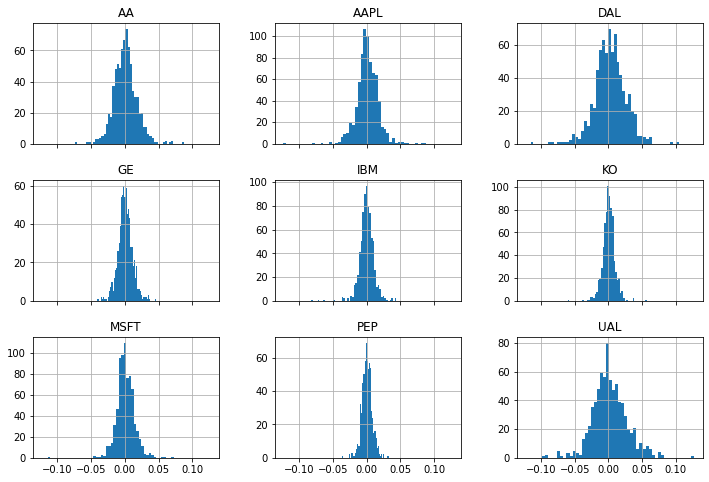

In [51]:
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

array([[<AxesSubplot:title={'center':'AA'}>,
        <AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'DAL'}>],
       [<AxesSubplot:title={'center':'GE'}>,
        <AxesSubplot:title={'center':'IBM'}>,
        <AxesSubplot:title={'center':'KO'}>],
       [<AxesSubplot:title={'center':'MSFT'}>,
        <AxesSubplot:title={'center':'PEP'}>,
        <AxesSubplot:title={'center':'UAL'}>]], dtype=object)

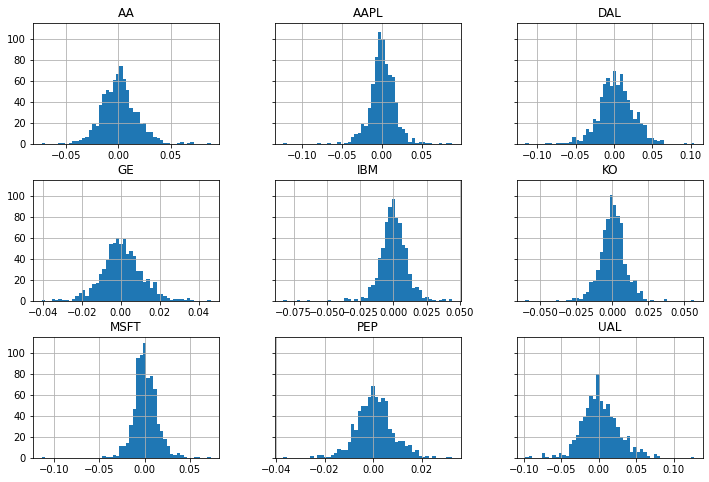

In [52]:
daily_pct_change.hist(bins=50, sharey=True, figsize=(12,8))

## QQ-Plots

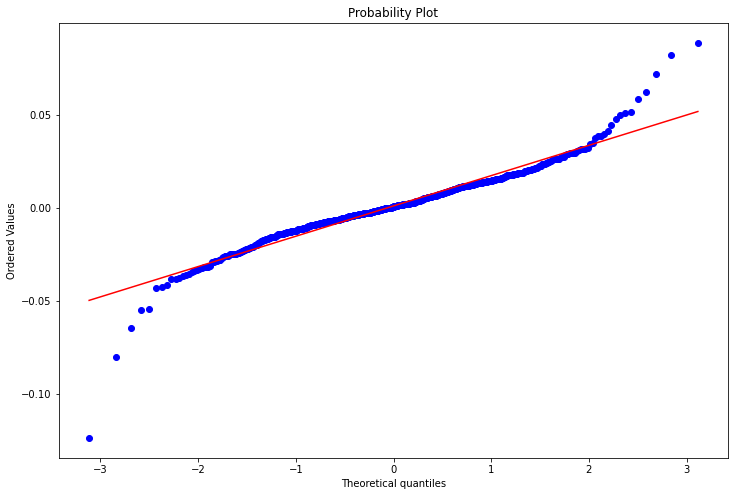

<Figure size 432x288 with 0 Axes>

In [53]:
# create a qq-plot of AAPl returns vs normal
import scipy.stats as stats
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
stats.probplot(aapl, dist='norm', plot=ax)
plt.show();
plt.savefig('5104OS_05_11.png', dpi=300)

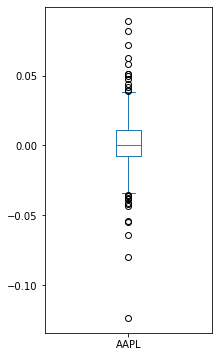

In [54]:
# create a box and whisker for the AAPL returns
_ = daily_pct_change[['AAPL']].plot(kind='box', figsize=(3,6));
plt.savefig('5104OS_05_12.png', dpi=300)

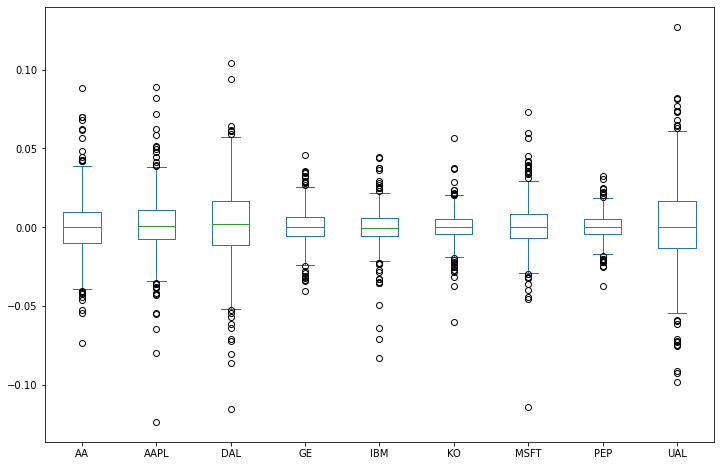

In [55]:

# examine all the returns 
daily_pct_change.plot(kind='box', figsize=(12,8));
plt.savefig('5104OS_05_13.png', dpi=300)

## Comparison of daily percent change between stocks

In [56]:
def render_scatter_plot(data, x_stock_name, 
                        y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name])
    if xlim is not None: ax.set_xlim(xlim)
    if ylim is not None: ax.set_ylim(xlim)
    ax.autoscale(False)
    # horiz and v lines at 0
    ax.vlines(0, -10, 10)
    ax.hlines(0, -10, 10)
    # this line would be perfect correlation
    ax.plot((-10, 10), (-10, 10))
    # label axes
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)

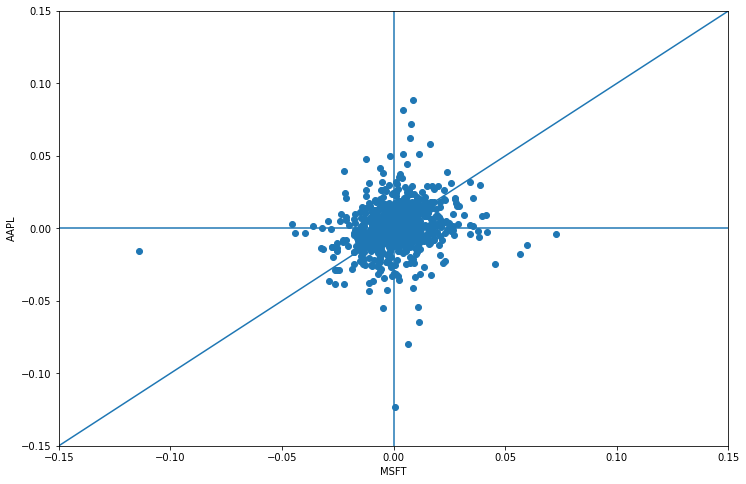

In [57]:

# MSFT vs AAPL
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'MSFT', 'AAPL', xlim=limits, ylim=limits)

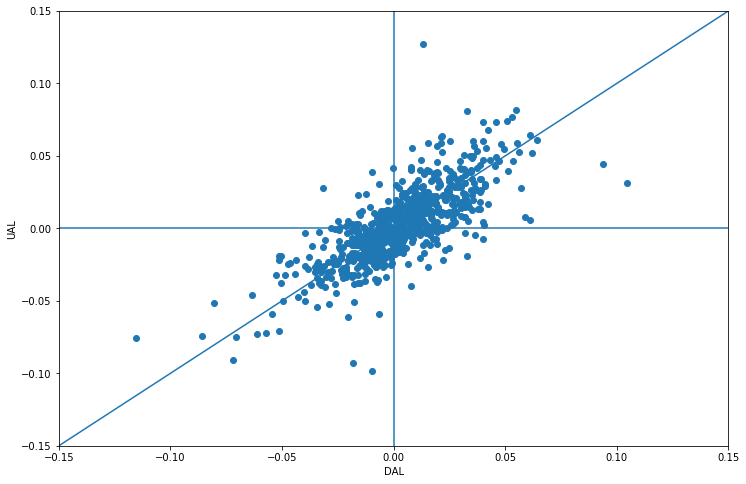

In [58]:

# DAL vs UAL
render_scatter_plot(daily_pct_change, 'DAL', 'UAL', xlim=limits, ylim=limits)

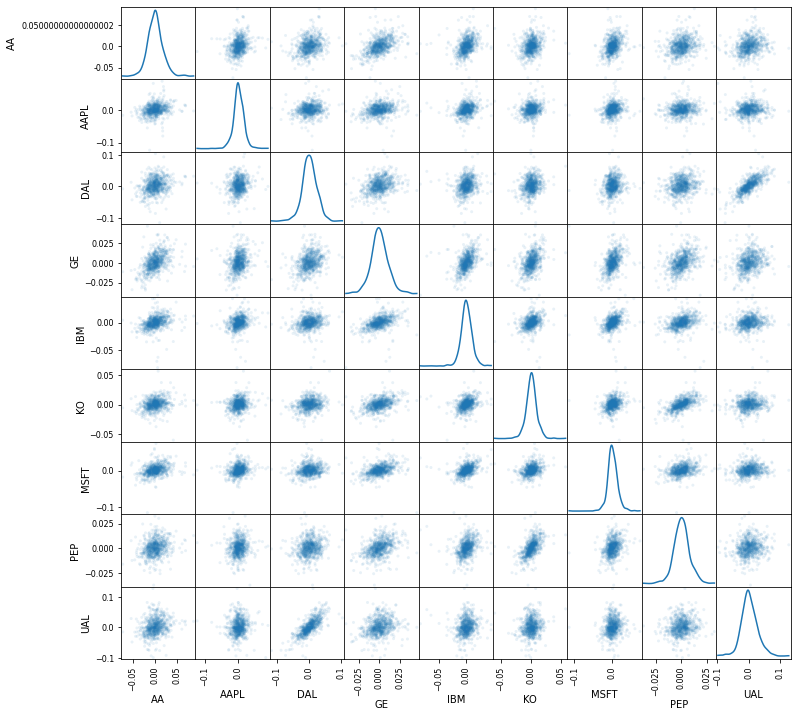

In [59]:
# all stocks against each other, with a KDE in the diagonal
from pandas.plotting import scatter_matrix
scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,
                      figsize=(12,12));


## Moving windows

In [60]:
msftAC = msft['2012']['Adj Close']
msftAC

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


Date
2012-01-03    21.707
2012-01-04    22.218
2012-01-05    22.445
2012-01-06    22.794
2012-01-09    22.494
               ...  
2012-12-24    22.563
2012-12-26    22.396
2012-12-27    22.480
2012-12-28    22.138
2012-12-31    22.271
Name: Adj Close, Length: 250, dtype: float64

<AxesSubplot:xlabel='Date'>

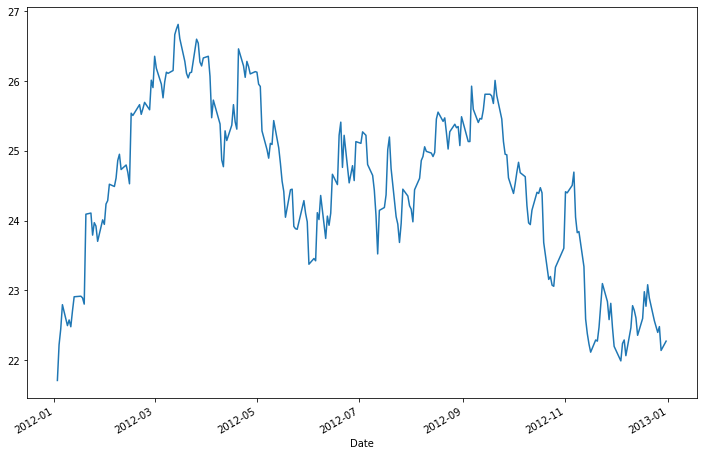

In [61]:
sample = msftAC['2012']
sample.plot(figsize=(12,8))

In [62]:
#!pip install pandas --upgrade

In [65]:
from pandas import rolling_mean
sample.plot(figsize=(12,8))
pd.rolling_mean(sample, 5).plot(figsize=(12,8));

ImportError: ignored

AttributeError: ignored

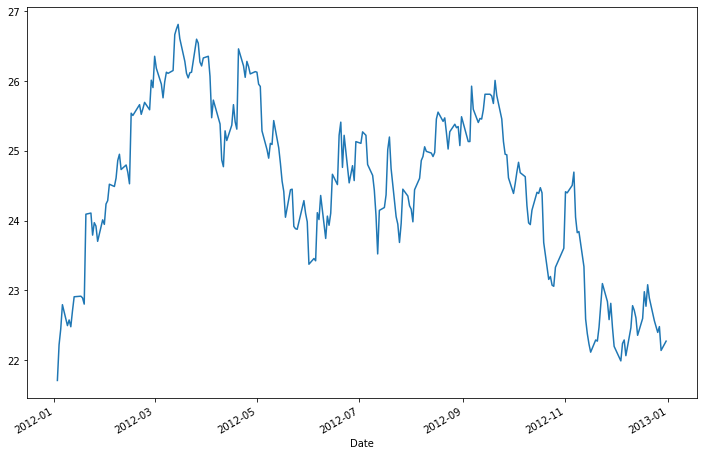

In [69]:

sample.plot(figsize=(12,8))
pd.rolling_mean(sample, 5).plot(figsize=(12,8))
pd.rolling_mean(sample, 10).plot(figsize=(12,8))
pd.rolling_mean(sample, 20).plot(figsize=(12,8));


In [68]:
mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()
pd.rolling_apply(sample, 5, mean_abs_dev).plot(figsize=(12,8));


AttributeError: ignored

AttributeError: ignored

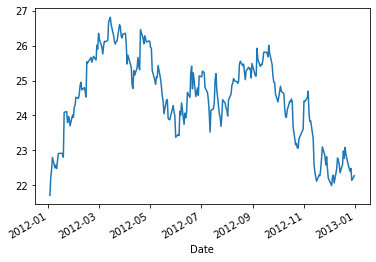

In [70]:
expanding_mean = lambda x: pd.rolling_mean(x, len(x), 
                                           min_periods=1)
sample.plot()
pd.expanding_mean(sample).plot(figsize=(12,8));

## Volatility Calculation

In [74]:

# use a minimum of 75 days
min_periods = 75
# calculate the rolling standard deviation
vol = pd.rolling_std(daily_pct_change, min_periods) * \
                     np.sqrt(min_periods)
# plot it
_ = vol.plot(figsize=(10, 8));

AttributeError: ignored

## Rolling correlation of returns

In [75]:

# one year (252 days) rolling correlation of AAPL and MSFT
rolling_corr = pd.rolling_corr(daily_pct_change['AAPL'], 
                               daily_pct_change['MSFT'], 
                               window=252).dropna()
rolling_corr[251:] #first 251 are NaN

AttributeError: ignored

In [76]:
_ = rolling_corr.plot(figsize=(12,8));

NameError: ignored

## Least square regression of returns (beta)

In [77]:
# least squares on the returns of AAPL and MSFT
model = pd.ols(y=daily_pct_change['AAPL'], 
               x={'MSFT': daily_pct_change['MSFT']}, 
               window=250)
model

AttributeError: ignored